In [8]:
!pip install category_encoders


In [9]:
!pip install projectpro

In [10]:
#! pip install xgboost

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
import projectpro
projectpro.checkpoint('1e808c')

<IPython.core.display.Javascript object>

### >> **DATA** **CLEANING**

In [13]:
data = pd.read_csv("train-2 (1).csv")


In [14]:
df = data.copy()

In [15]:
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


In [16]:
df.tail()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67
44999,F45000,Airline B,Harrisport,Chelsealand,4890.0,3:37,11:19,7.70,Airbus A320,0,Monday,December,Winter,Low,Rain,91,None,0.95,532.92


In [17]:
df.shape

(45000, 19)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      45000 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Airline,7.940000
Promotion_Type,0.895556
Departure_City,0.755556
Demand,0.704444
Weather_Conditions,0.671111
Month_of_Travel,0.593333
Day_of_Week,0.500000
Arrival_City,0.413333
Distance,0.202222
Fuel_Price,0.200000


In [20]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [21]:
len(df['Flight_ID'])

45000

In [22]:
df.shape

(45000, 19)

In [23]:
df.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [24]:
df['Airline'].value_counts()

Airline A    13863
Airline C    13809
Airline B    13755
Name: Airline, dtype: int64

In [25]:
df['Airline'].value_counts().sort_values()


Airline B    13755
Airline C    13809
Airline A    13863
Name: Airline, dtype: int64

In [26]:
df['Airline'].value_counts().sort_values(ascending = False)

Airline A    13863
Airline C    13809
Airline B    13755
Name: Airline, dtype: int64

In [27]:
###what is the difference between these 2?


#df['Airline'].fillna(df['Airline'].mode,inplace = True)
import pandas as pd

# Assuming your data is in a DataFrame called df
df['Airline'].fillna(df['Airline'].mode()[0], inplace=True)


In [28]:
df['Airline'].isnull().sum()

0

In [29]:
df['Departure_City'].value_counts()

Port Michael         49
West Michael         47
North Michael        42
South Michael        40
North David          39
                     ..
Bettyton              1
Medinashire           1
East Loriview         1
Lake Nicholasfurt     1
East Patriciafurt     1
Name: Departure_City, Length: 23187, dtype: int64

In [30]:
df['Departure_City'].unique()

array([nan, 'Leonardland', 'South Dylanville', ..., 'Reillybury',
       'Lake Katiestad', 'East Patriciafurt'], dtype=object)

In [31]:
df['Departure_City'].mode()

0    Port Michael
Name: Departure_City, dtype: object

In [32]:
#df['Departure_City'].fillna(df['Departure_City'].mode, inplace = True)
df['Departure_City'].fillna(df['Departure_City'].mode()[0], inplace=True)

In [33]:
df["Arrival_City"].value_counts()

North Michael       49
Port Michael        47
Lake Michael        42
South David         35
Michaelmouth        35
                    ..
Summerland           1
North Lindafurt      1
West Waynetown       1
North Keithmouth     1
Gabrielville         1
Name: Arrival_City, Length: 23479, dtype: int64

In [34]:
df["Arrival_City"].mode()

0    North Michael
Name: Arrival_City, dtype: object

In [35]:
df["Arrival_City"].unique()

array(['Greenshire', 'New Stephen', 'Port Ambermouth', ...,
       'South Susanville', 'East Vickiberg', 'Gabrielville'], dtype=object)

In [36]:
#df["Arrival_City"].fillna('North Michael',inplace = True)
df['Arrival_City'].fillna(df['Arrival_City'].mode()[0], inplace=True)

In [37]:
df.isnull().sum()

Flight_ID               0
Airline                 0
Departure_City          0
Arrival_City            0
Distance               91
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type          43
Number_of_Stops         0
Day_of_Week           225
Month_of_Travel       267
Holiday_Season          0
Demand                317
Weather_Conditions    302
Passenger_Count         0
Promotion_Type        403
Fuel_Price             90
Flight_Price            0
dtype: int64

In [38]:
df['Distance'].value_counts()

4902.0    15
6019.0    15
9526.0    15
7140.0    15
2300.0    14
          ..
3827.0     1
4791.0     1
3072.0     1
7219.0     1
6443.0     1
Name: Distance, Length: 8946, dtype: int64

In [39]:
df['Distance'].describe()

count    44909.000000
mean      5482.238727
std       2594.847860
min       1000.000000
25%       3230.000000
50%       5476.000000
75%       7725.000000
max      10000.000000
Name: Distance, dtype: float64

In [40]:
df['Distance'].median()

5476.0

In [41]:
#df['Distance'].fillna(df['Distance'].median , inplace = True)

In [42]:
df = df.dropna(subset=['Distance'])

In [43]:
df['Departure_Time'].value_counts()

0:22     47
3:50     46
13:11    46
22:34    46
9:25     46
         ..
7:19     16
21:36    16
9:29     16
10:45    16
8:37     14
Name: Departure_Time, Length: 1440, dtype: int64

In [44]:
#df['Departure_Time'].fillna(df['Departure_Time'].mode , inplace = True)
#df['Arrival_Time'].fillna(df['Arrival_Time'].mode , inplace = True)

In [45]:
df['Duration'].value_counts()

7.09     63
7.30     57
10.59    57
9.32     57
6.22     57
         ..
1.41      1
14.43     1
1.47      1
1.38      1
1.45      1
Name: Duration, Length: 1313, dtype: int64

In [46]:
df['Duration'].mode()

0    7.09
Name: Duration, dtype: float64

In [47]:
df['Duration'].mean()

7.853353670756419

In [48]:
df['Duration'].median()

7.84

In [49]:
#df['Duration'].fillna(df['Duration'].median , inplace = True)
# Assuming your data is in a DataFrame called df
#df = df.dropna(subset=['Distance'])


In [50]:
df.isnull().sum()

Flight_ID               0
Airline                 0
Departure_City          0
Arrival_City            0
Distance                0
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type          43
Number_of_Stops         0
Day_of_Week           223
Month_of_Travel       266
Holiday_Season          0
Demand                317
Weather_Conditions    302
Passenger_Count         0
Promotion_Type        401
Fuel_Price             90
Flight_Price            0
dtype: int64

In [51]:
df['Aircraft_Type'].value_counts()

Airbus A320    9083
Boeing 777     9044
Boeing 787     8934
Airbus A380    8928
Boeing 737     8877
Name: Aircraft_Type, dtype: int64

In [52]:
#df['Aircraft_Type'].fillna('Airbus A380', inplace = True)
df['Aircraft_Type'].fillna(df['Aircraft_Type'].mode()[0], inplace=True)

In [53]:
df['Number_of_Stops'].value_counts()

1    22232
0    20125
3     2552
Name: Number_of_Stops, dtype: int64

In [54]:
df['Number_of_Stops'].mode()

0    1
Name: Number_of_Stops, dtype: int64

In [55]:
#df['Number_of_Stops'].fillna(df['Number_of_Stops'].mode, inplace = True)

In [56]:
df['Day_of_Week'].value_counts()

Sunday       6456
Saturday     6404
Friday       6398
Monday       6398
Wednesday    6396
Tuesday      6328
Thursday     6306
Name: Day_of_Week, dtype: int64

In [57]:
#df['Day_of_Week'].fillna('Sunday',inplace = True)
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)

In [58]:
df['Month_of_Travel'].value_counts()

January      3838
October      3801
April        3765
July         3753
November     3743
September    3722
March        3718
August       3702
December     3694
June         3668
May          3651
February     3588
Name: Month_of_Travel, dtype: int64

In [59]:
#df['Month_of_Travel'].fillna('January',inplace = True)
df['Month_of_Travel'].fillna(df['Month_of_Travel'].mode()[0], inplace=True)

In [60]:
df['Holiday_Season'].value_counts()

Spring    9021
None      9001
Fall      8990
Summer    8955
Winter    8942
Name: Holiday_Season, dtype: int64

In [61]:
df['Holiday_Season'].fillna(df['Holiday_Season'].mode()[0],inplace = True)

In [62]:
df['Demand'].value_counts()

Low       28886
Medium     8933
High       6773
Name: Demand, dtype: int64

In [63]:
#df['Demand'].fillna('Low' , inplace = True)
df['Demand'].fillna(df['Demand'].mode()[0],inplace = True)

In [64]:
df.isnull().sum()

Flight_ID               0
Airline                 0
Departure_City          0
Arrival_City            0
Distance                0
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           0
Number_of_Stops         0
Day_of_Week             0
Month_of_Travel         0
Holiday_Season          0
Demand                  0
Weather_Conditions    302
Passenger_Count         0
Promotion_Type        401
Fuel_Price             90
Flight_Price            0
dtype: int64

In [65]:
df['Weather_Conditions'].value_counts()

Cloudy    11385
Snow      11129
Rain      11072
Clear     11021
Name: Weather_Conditions, dtype: int64

In [66]:
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0] , inplace = True)

In [67]:
df['Passenger_Count'].value_counts()

167    212
110    211
300    207
55     207
179    203
      ... 
171    152
191    151
87     151
54     150
244    147
Name: Passenger_Count, Length: 251, dtype: int64

In [68]:
print(df['Passenger_Count'].mean())
print(df['Passenger_Count'].median())
print(df['Passenger_Count'].mode())

174.92083992072858
175.0
0    167
Name: Passenger_Count, dtype: int64


In [69]:
#df['Passenger_Count'].fillna(df['Passenger_Count'].median , inplace = True)

In [70]:
df['Promotion_Type'].value_counts()

Special Offer    14871
Discount         14852
None             14785
Name: Promotion_Type, dtype: int64

In [71]:
#df['Promotion_Type'].fillna('Special Offer' , inplace = True)
df['Promotion_Type'].fillna(df['Promotion_Type'].mode()[0] , inplace = True)

In [72]:
df['Fuel_Price'].value_counts()

1.07    727
0.98    685
0.57    684
0.76    682
0.67    671
       ... 
1.10    585
0.89    583
0.59    558
0.50    330
1.20    306
Name: Fuel_Price, Length: 71, dtype: int64

In [73]:
print(df['Fuel_Price'].mean())
print(df['Fuel_Price'].median())
print(df['Fuel_Price'].mode())

0.8501820656418037
0.85
0    1.07
Name: Fuel_Price, dtype: float64


In [74]:
df['Fuel_Price'].max()

1.2

In [75]:
df['Fuel_Price'].min()

0.5

In [76]:
#df['Fuel_Price'].fillna(df['Fuel_Price'].median, inplace = True)
df['Fuel_Price'].fillna(df['Fuel_Price'].median(), inplace=True)

In [77]:
df['Flight_Price'].value_counts()

536.57     6
471.25     6
347.87     6
446.03     6
510.22     6
          ..
1012.71    1
322.05     1
636.92     1
301.53     1
532.92     1
Name: Flight_Price, Length: 31295, dtype: int64

In [78]:
df['Flight_Price'].mean()

574.6410091518403

In [79]:
df['Flight_Price'].median()

565.83

In [80]:
len(df['Flight_Price'])

44909

In [81]:

#df = df.dropna(subset=['Flight_Price'])


In [82]:
#df = df.dropna(subset=['Distance'])

In [83]:
df.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [84]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [85]:
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [86]:
df.dtypes

Flight_ID                     object
Airline                       object
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type                 object
Number_of_Stops                int64
Day_of_Week                   object
Month_of_Travel               object
Holiday_Season                object
Demand                        object
Weather_Conditions            object
Passenger_Count                int64
Promotion_Type                object
Fuel_Price                   float64
Flight_Price                 float64
dtype: object

In [87]:

df.drop(columns='Flight_ID', inplace=True)

df.drop(columns='Departure_Time', inplace=True)


df.drop(columns='Arrival_Time', inplace=True)



In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44909 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             44909 non-null  object 
 1   Departure_City      44909 non-null  object 
 2   Arrival_City        44909 non-null  object 
 3   Distance            44909 non-null  float64
 4   Duration            44909 non-null  float64
 5   Aircraft_Type       44909 non-null  object 
 6   Number_of_Stops     44909 non-null  int64  
 7   Day_of_Week         44909 non-null  object 
 8   Month_of_Travel     44909 non-null  object 
 9   Holiday_Season      44909 non-null  object 
 10  Demand              44909 non-null  object 
 11  Weather_Conditions  44909 non-null  object 
 12  Passenger_Count     44909 non-null  int64  
 13  Promotion_Type      44909 non-null  object 
 14  Fuel_Price          44909 non-null  float64
 15  Flight_Price        44909 non-null  float64
dtypes: f

In [89]:
df.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,44909.000000,44909.000000,44909.000000,44909.000000,44909.000000
mean,5482.238727,7.853354,0.665524,174.920840,0.850182,574.641009
std,2594.847860,3.293249,0.750713,72.385189,0.201552,160.261093
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.290000
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.830000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.830000
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


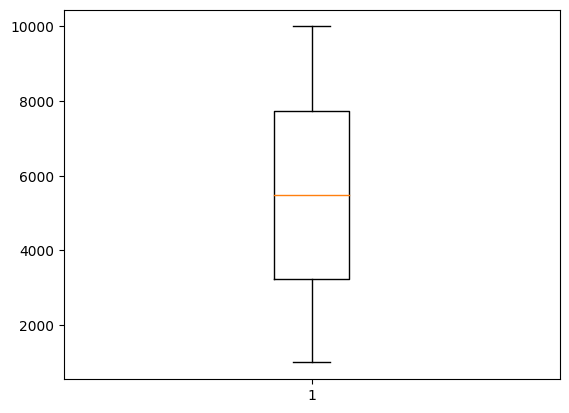

In [90]:
# Creating plot
plt.boxplot(df['Distance'] )

# show plot
plt.show()

In [91]:
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [92]:
lower_bound , upper_bound

(-3512.5, 14467.5)

In [93]:
df.Distance = df.Distance.clip(lower_bound , upper_bound)

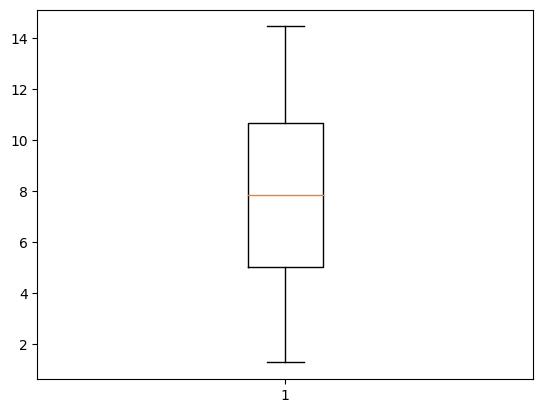

In [94]:
# Creating plot
plt.boxplot(df['Duration'] )

# show plot
plt.show()

In [95]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound


(-3.375000000000001, 19.065)

In [96]:
df.Duration = df.Duration.clip(lower_bound , upper_bound)

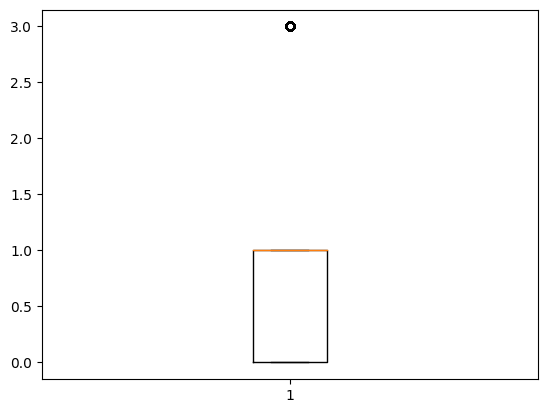

In [97]:
# Creating plot
plt.boxplot(df['Number_of_Stops'] )

# show plot
plt.show()

In [98]:
Q1 = df['Number_of_Stops'].quantile(0.25)
Q3 = df['Number_of_Stops'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound


(-1.5, 2.5)

In [99]:
#df.Number_of_Stops = df.Number_of_Stops.clip(lower_bound , upper_bound)

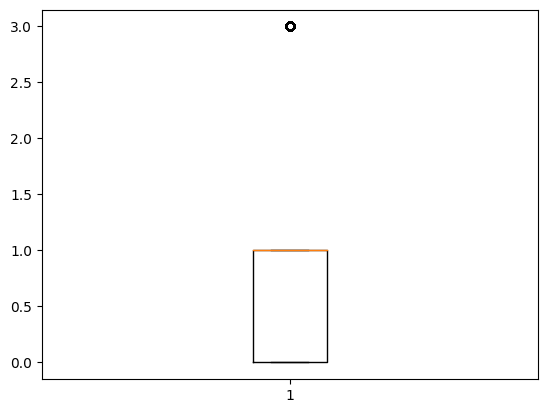

In [100]:
# Creating plot
plt.boxplot(df['Number_of_Stops'] )

# show plot
plt.show()

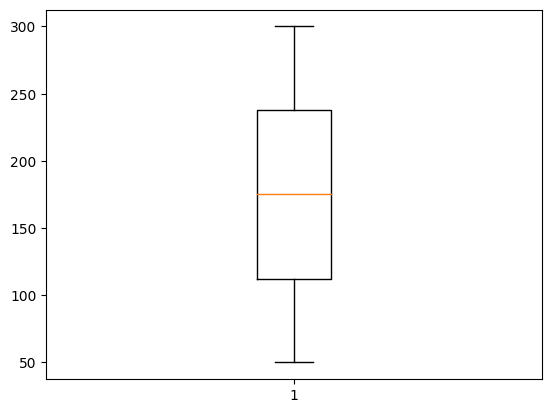

In [101]:
# Creating plot
plt.boxplot(df['Passenger_Count'] )

# show plot
plt.show()

In [102]:
Q1 = df['Passenger_Count'].quantile(0.25)
Q3 = df['Passenger_Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-77.0, 427.0)

In [103]:
df.Passenger_Count = df.Passenger_Count.clip(lower_bound , upper_bound)

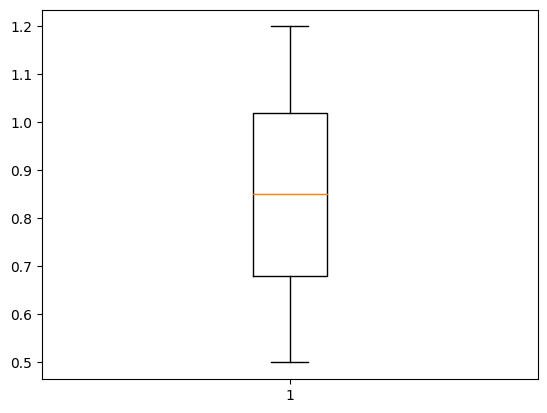

In [104]:
# Creating plot
plt.boxplot(df['Fuel_Price'] )

# show plot
plt.show()

In [105]:
Q1 = df['Fuel_Price'].quantile(0.25)
Q3 = df['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(0.17000000000000004, 1.53)

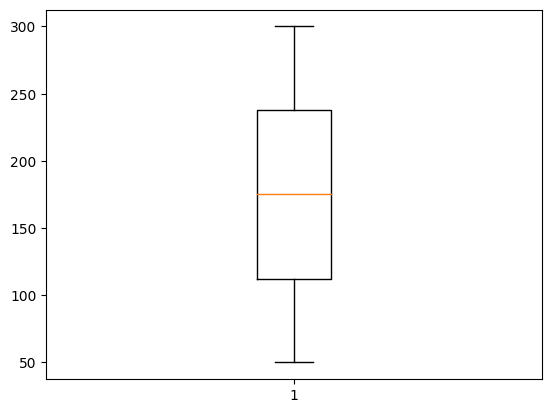

In [106]:
# Creating plot
plt.boxplot(df['Passenger_Count'] )

# show plot
plt.show()

In [107]:
df.Fuel_Price = df.Fuel_Price.clip(lower_bound , upper_bound)

In [108]:
Q1 = df['Flight_Price'].quantile(0.25)
Q3 = df['Flight_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(118.47999999999996, 1016.6400000000001)

In [109]:
df.Flight_Price = df.Flight_Price.clip(lower_bound , upper_bound)

In [110]:
df.columns

Index(['Airline', 'Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel',
       'Holiday_Season', 'Demand', 'Weather_Conditions', 'Passenger_Count',
       'Promotion_Type', 'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [111]:
df

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [112]:
df['Number_of_Stops'].dtype

dtype('int64')

In [113]:
df['Number_of_Stops'].value_counts()

1    22232
0    20125
3     2552
Name: Number_of_Stops, dtype: int64

### >> EDA

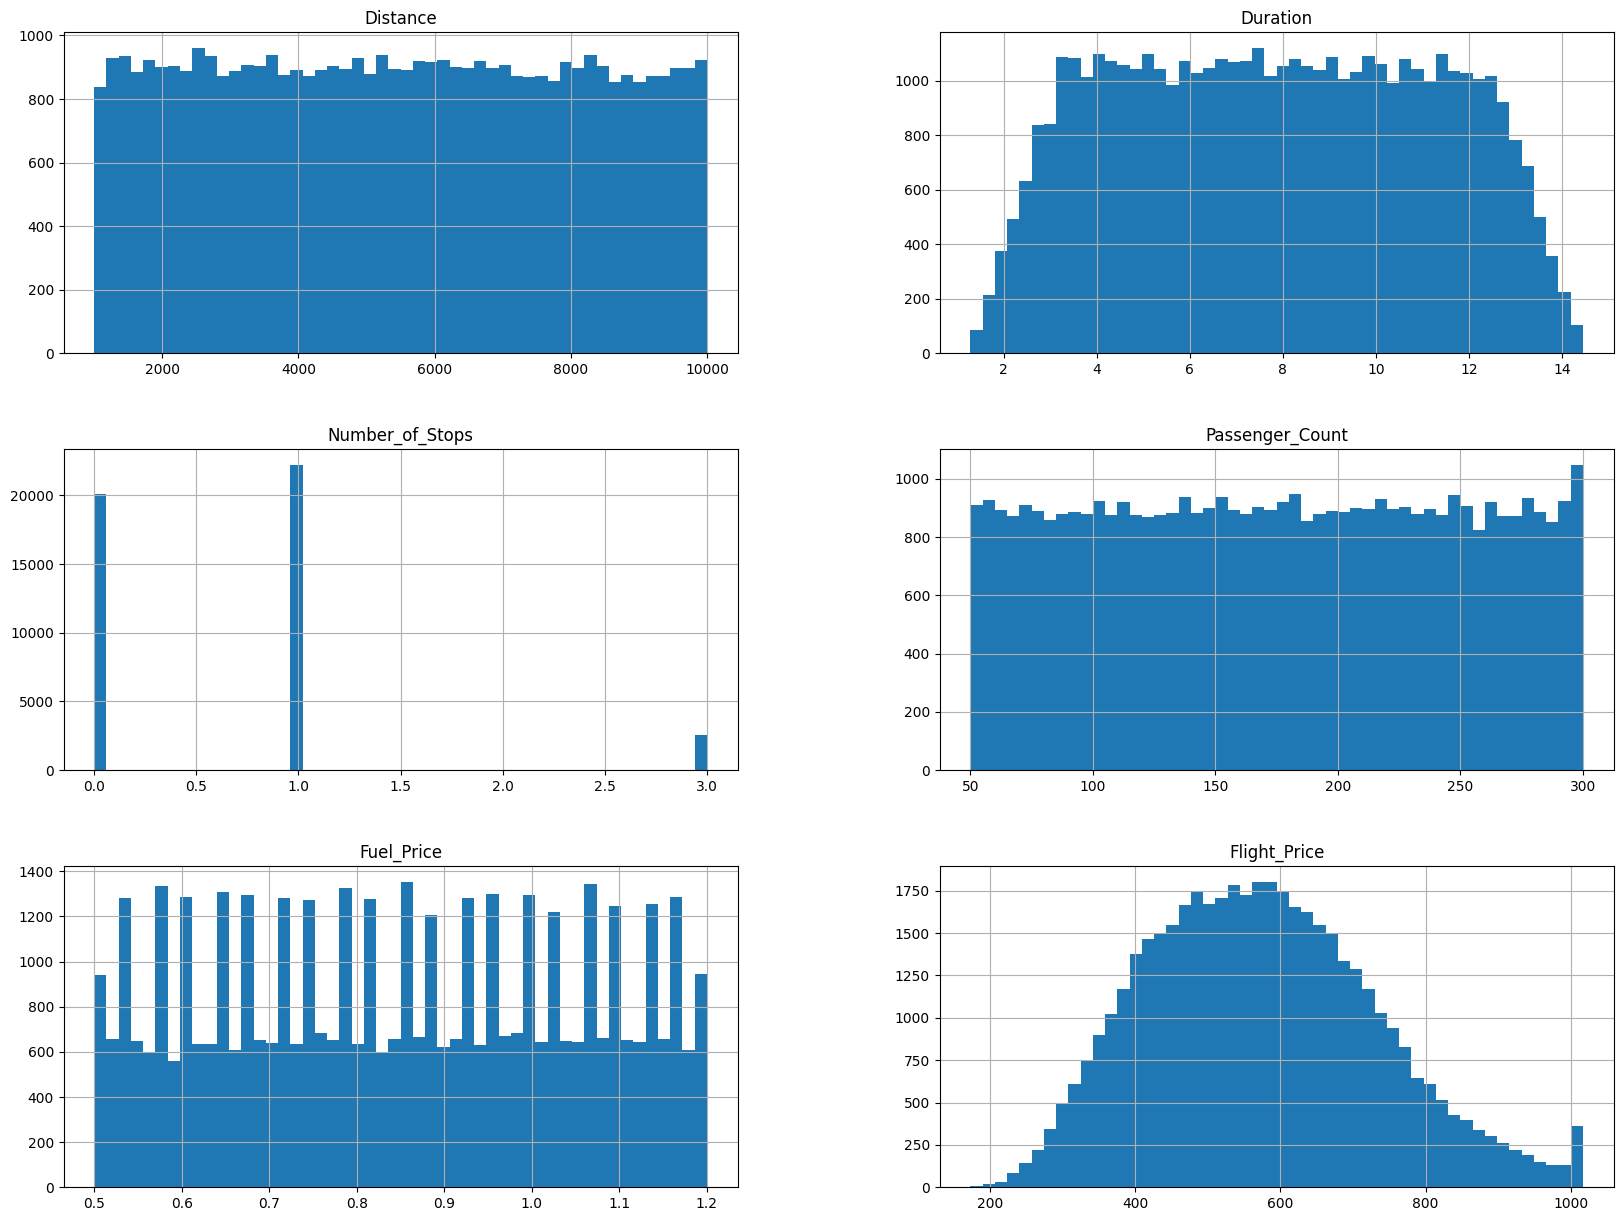

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [115]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()

In [116]:
cat_columns , int_columns , float_columns

(['Airline',
  'Departure_City',
  'Arrival_City',
  'Aircraft_Type',
  'Day_of_Week',
  'Month_of_Travel',
  'Holiday_Season',
  'Demand',
  'Weather_Conditions',
  'Promotion_Type'],
 ['Number_of_Stops', 'Passenger_Count'],
 ['Distance', 'Duration', 'Fuel_Price', 'Flight_Price'])

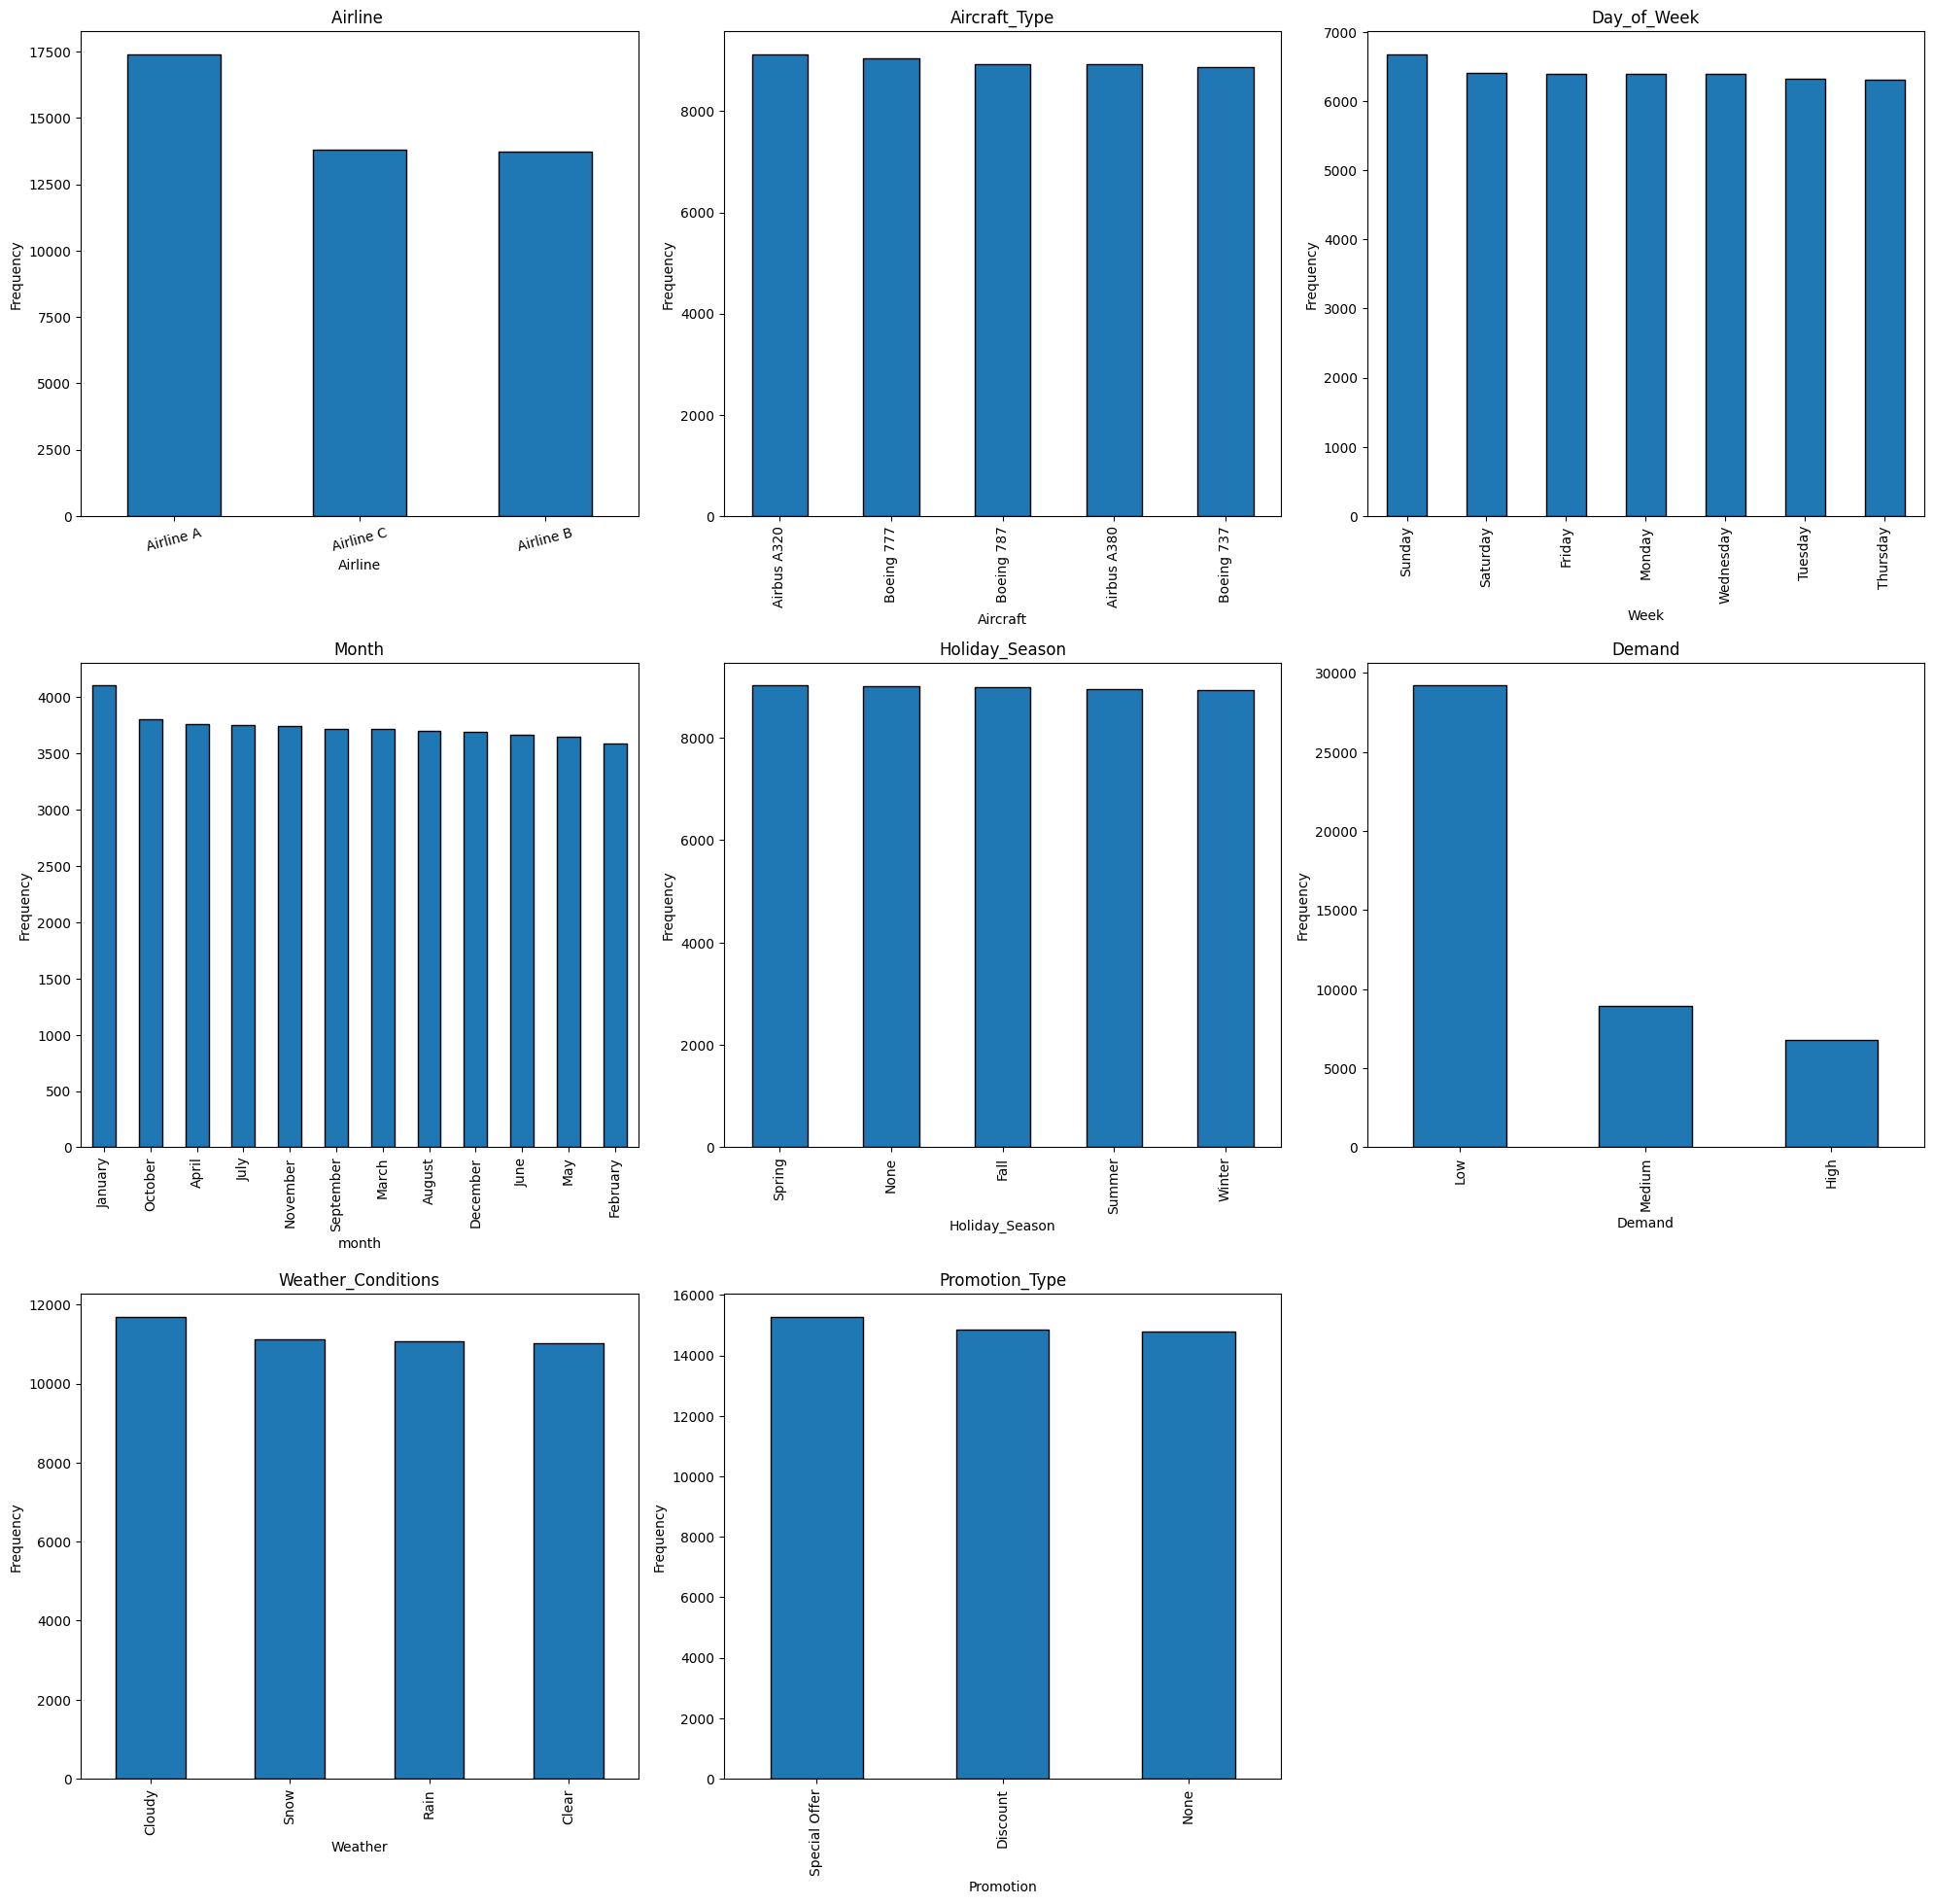

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

plt.subplot(431)
df['Airline'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Airline ')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['Aircraft_Type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type')
plt.xlabel('Aircraft')
plt.ylabel('Frequency')

plt.subplot(433)
df['Day_of_Week'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week')
plt.xlabel('Week')
plt.ylabel('Frequency')

plt.subplot(434)
df['Month_of_Travel'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Month')
plt.xlabel('month')
plt.ylabel('Frequency')

plt.subplot(435)
df['Holiday_Season'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season')
plt.xlabel('Holiday_Season')
plt.ylabel('Frequency')

plt.subplot(436)
df['Demand'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')

plt.subplot(437)
df['Weather_Conditions'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions')
plt.xlabel('Weather')
plt.ylabel('Frequency')

plt.subplot(438)
df['Promotion_Type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type')
plt.xlabel('Promotion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


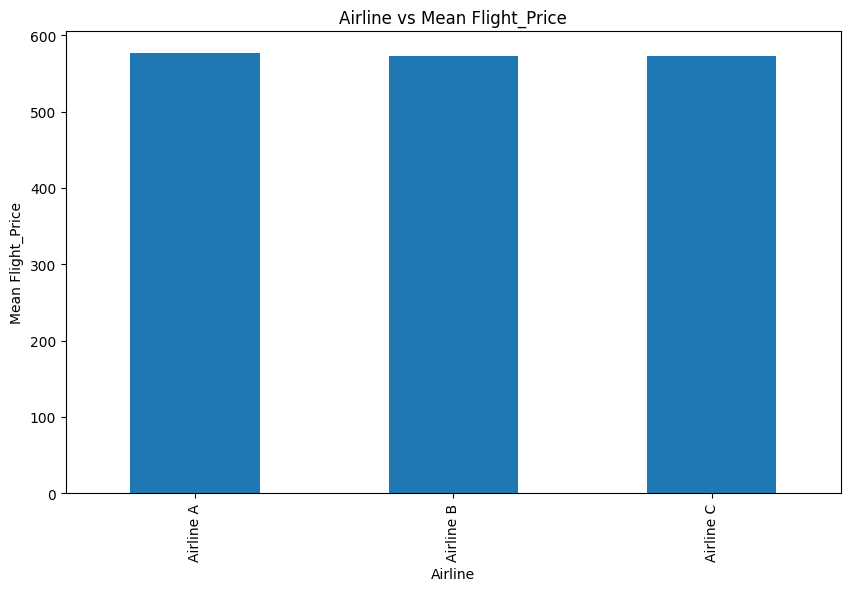

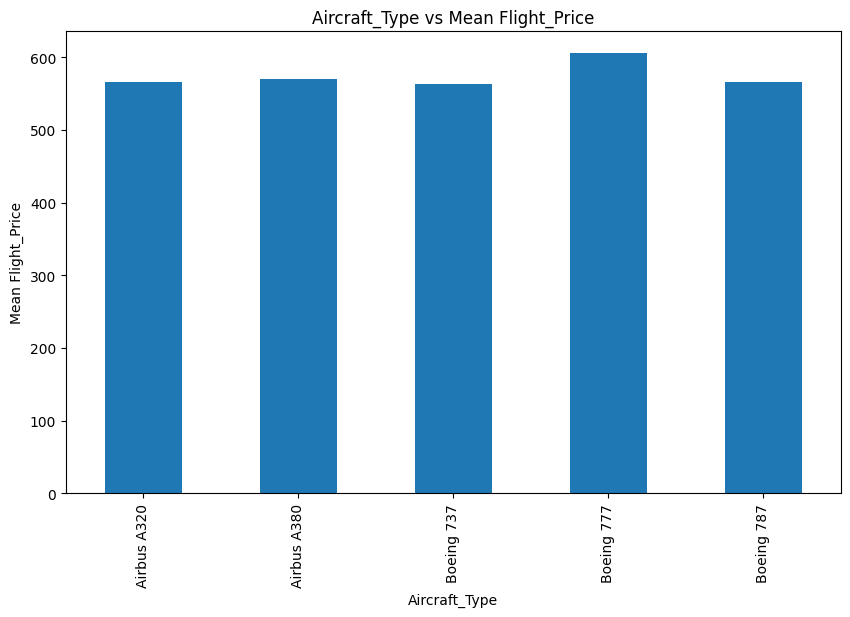

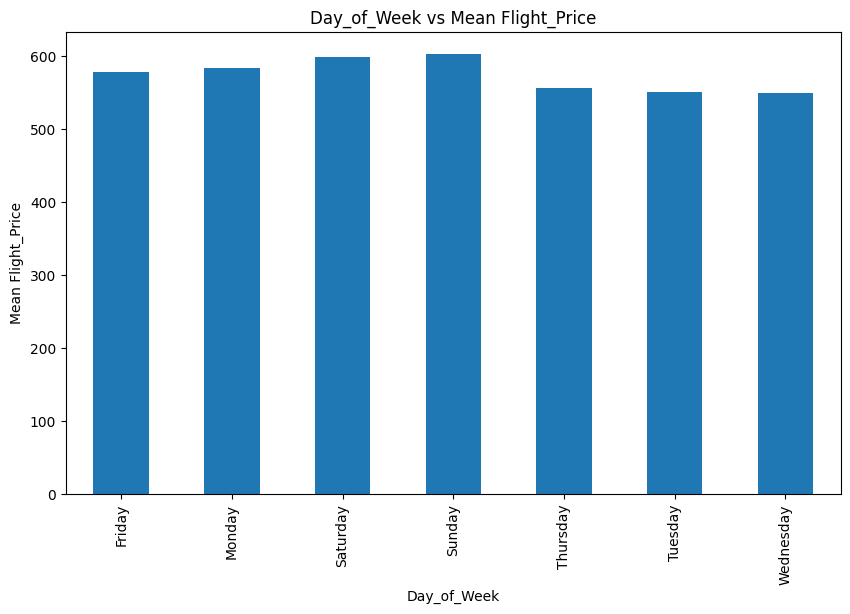

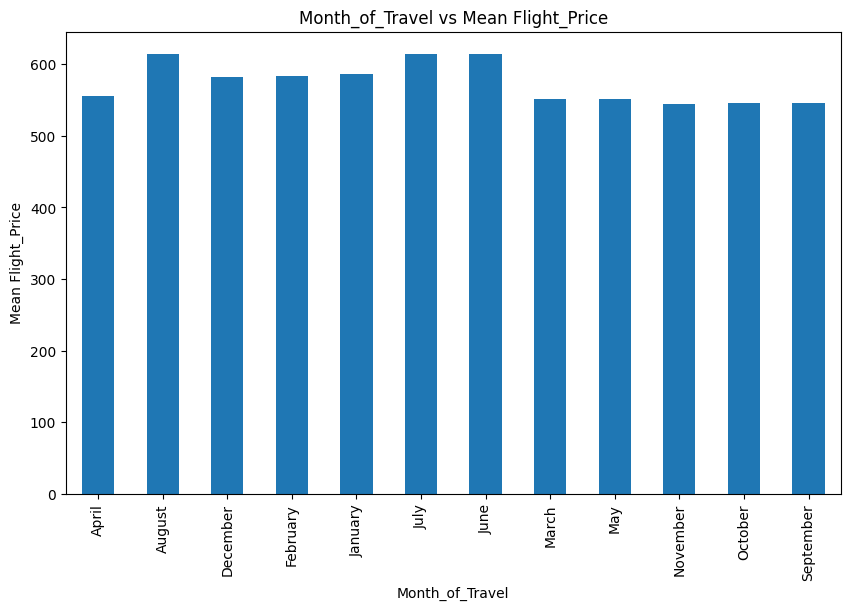

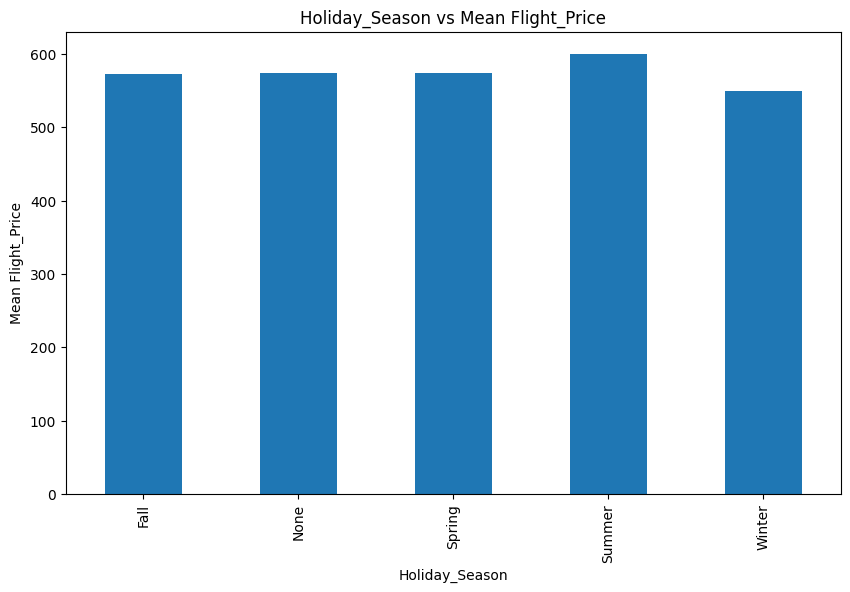

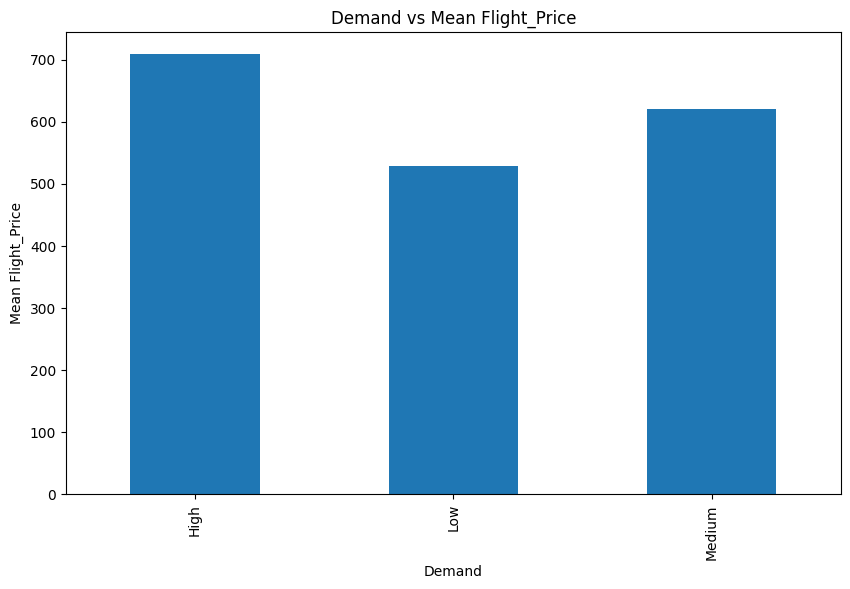

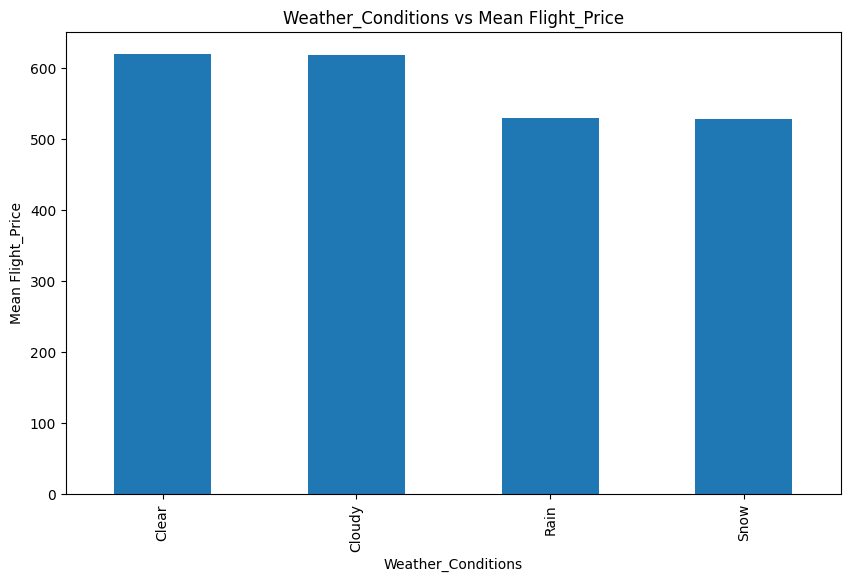

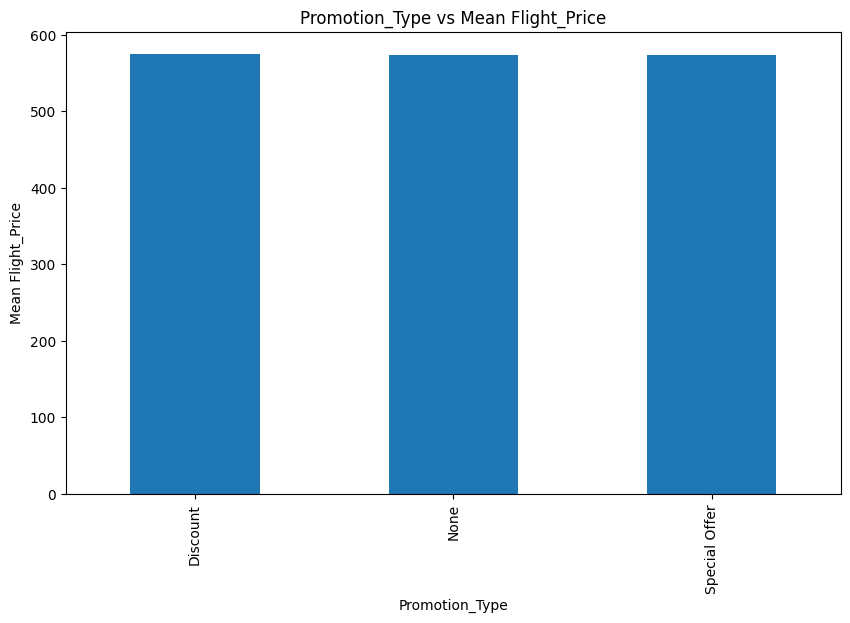

In [118]:
# Assuming 'df' is your DataFrame

# List of features to plot
features = [
    'Airline',
    'Aircraft_Type',
    'Day_of_Week',
    'Month_of_Travel',
    'Holiday_Season',
    'Demand',
    'Weather_Conditions',
    'Promotion_Type'
]

# Plotting features against the target 'Flight_Price'
for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatter plot for continuous features
    if df[feature].dtype != 'object':
        plt.scatter(df[feature], df['Flight_Price'], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel('Flight_Price')
        plt.title(f'{feature} vs Flight_Price')

    # Bar plot for categorical features
    else:
        df.groupby(feature)['Flight_Price'].mean().plot(kind='bar')
        plt.xlabel(feature)
        plt.ylabel('Mean Flight_Price')
        plt.title(f'{feature} vs Mean Flight_Price')

    plt.show()



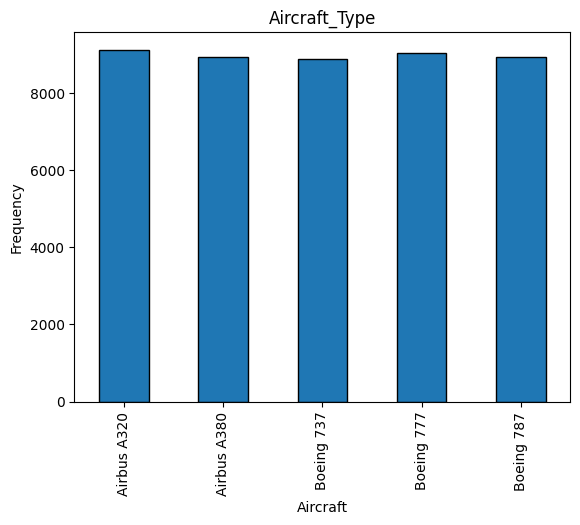

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df['Aircraft_Type'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type')
plt.xlabel('Aircraft')
plt.ylabel('Frequency')
plt.show()

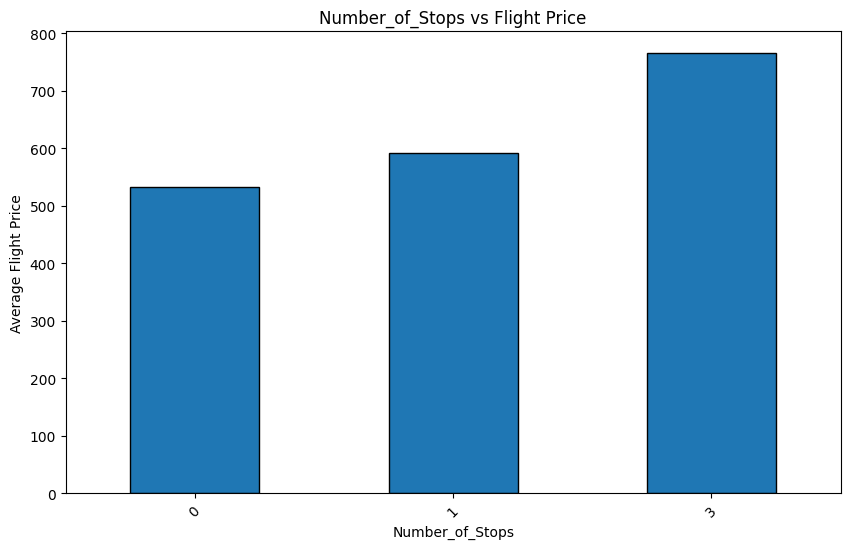

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group the data by 'Airline' and calculate the mean Flight_Price for each airline
airline_flight_price = df.groupby('Number_of_Stops')['Flight_Price'].mean()

# Sort the values in descending order (for example, to show the highest average prices at the top)
airline_flight_price = airline_flight_price.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
airline_flight_price.plot(kind='bar', edgecolor='k')
plt.title('Number_of_Stops vs Flight Price')
plt.xlabel('Number_of_Stops')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

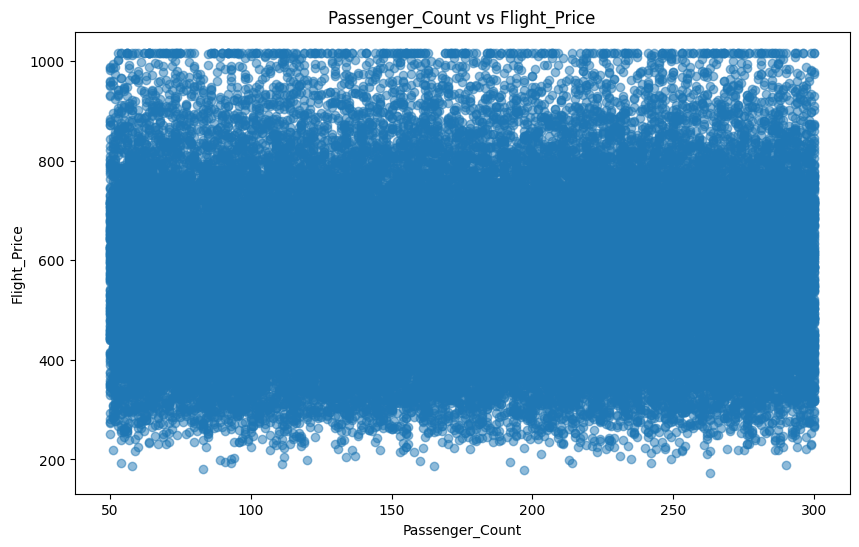

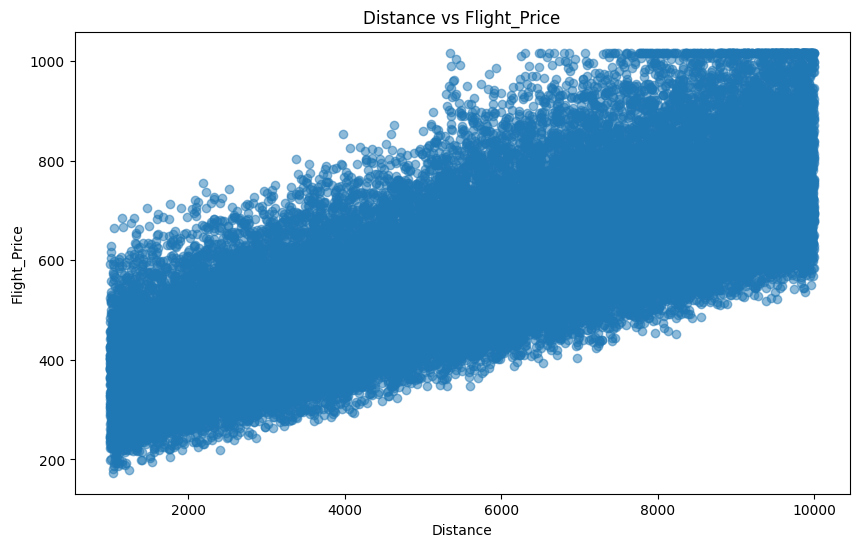

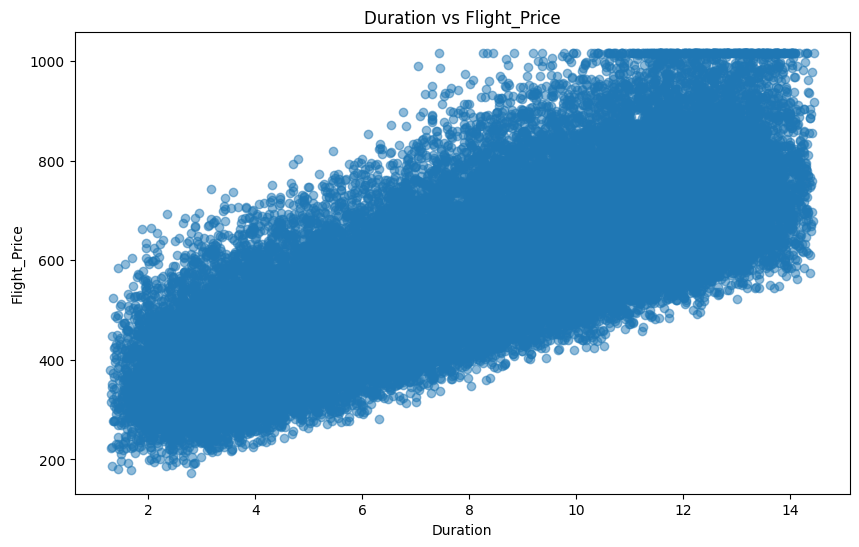

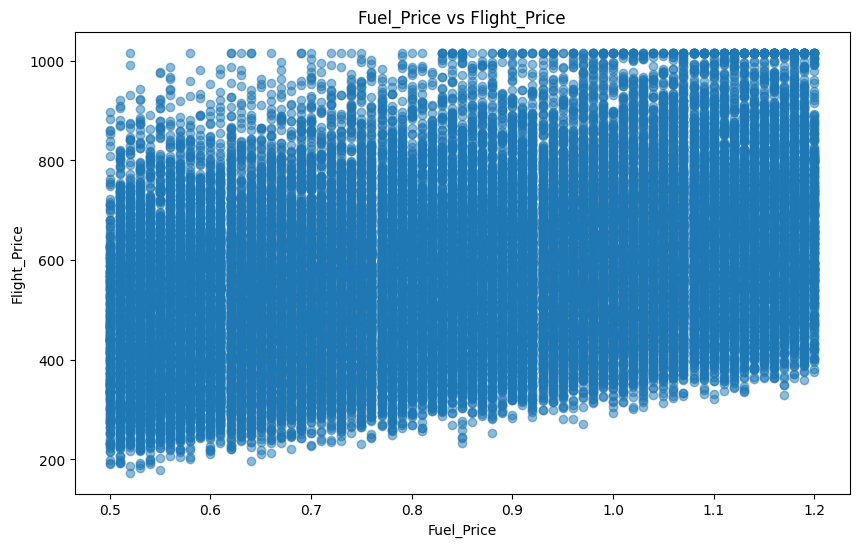

In [121]:
# Assuming 'df' is your DataFrame

features = [ 'Passenger_Count', 'Distance', 'Duration', 'Fuel_Price']
target = 'Flight_Price'

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()


In [122]:
df

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Airline B,Port Donaldland,Maryshire,3884.0,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,Airline A,East Patriciafurt,East Vickiberg,9191.0,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,Airline C,Monicaton,West Johnburgh,6757.0,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,Airline B,Turnerburgh,Gabrielville,3587.0,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [123]:
df['Promotion_Type'].value_counts()

Special Offer    15272
Discount         14852
None             14785
Name: Promotion_Type, dtype: int64

In [124]:
 modified= df.copy()

# >>**Encoding** **Categorical** **Variables**

In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44909 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             44909 non-null  object 
 1   Departure_City      44909 non-null  object 
 2   Arrival_City        44909 non-null  object 
 3   Distance            44909 non-null  float64
 4   Duration            44909 non-null  float64
 5   Aircraft_Type       44909 non-null  object 
 6   Number_of_Stops     44909 non-null  int64  
 7   Day_of_Week         44909 non-null  object 
 8   Month_of_Travel     44909 non-null  object 
 9   Holiday_Season      44909 non-null  object 
 10  Demand              44909 non-null  object 
 11  Weather_Conditions  44909 non-null  object 
 12  Passenger_Count     44909 non-null  int64  
 13  Promotion_Type      44909 non-null  object 
 14  Fuel_Price          44909 non-null  float64
 15  Flight_Price        44909 non-null  float64
dtypes: f

In [127]:
df['Number_of_Stops'].value_counts()

1    22232
0    20125
3     2552
Name: Number_of_Stops, dtype: int64

In [128]:
df.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [129]:
modified.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [130]:
modified['Airline'].value_counts()

Airline A    17396
Airline C    13784
Airline B    13729
Name: Airline, dtype: int64

In [131]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    modified[col] = label_encoder.fit_transform(modified[col])

modified.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,6,2,3,1,Rain,240,2,0.91,643.93
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,6,7,2,1,Rain,107,1,1.08,423.13
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,3,11,3,0,Cloudy,131,2,0.52,442.17
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,4,4,1,1,Clear,181,1,1.09,804.35


In [132]:
# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
modified = pd.get_dummies(modified, columns=categorical_cols, drop_first=True)


In [133]:
#df['Airline'] = df['Airline'].map({'Airline A':0,'Airline C ':1,'Airline B':2})
#df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
#df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
#df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
#df = pd.get_dummies(df, columns = ['buildtype'])

In [134]:
# Using pandas get_dummies function for One-Hot Encoding
#df_encoded = pd.get_dummies(df, columns=['Airline'], drop_first=False)
#df_encoded = pd.get_dummies(df, columns=['Aircraft_Type'], drop_first=False)
#df = pd.get_dummies(df, columns = ['buildtype'])

In [135]:
modified

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,...,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,Port Michael,Greenshire,8286.0,11.94,0,6,2,3,1,240,...,643.93,1,0,0,0,0,1,0,1,0
1,Leonardland,New Stephen,2942.0,5.29,0,6,7,2,1,107,...,423.13,0,1,0,0,0,0,0,1,0
2,South Dylanville,Port Ambermouth,2468.0,4.41,1,3,11,3,0,131,...,442.17,1,0,0,0,0,1,1,0,0
3,Blakefort,Crosbyberg,3145.0,4.96,0,3,3,0,1,170,...,394.42,0,0,0,0,0,1,1,0,0
4,Michaelport,Onealborough,5558.0,8.09,1,4,4,1,1,181,...,804.35,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,Port Donaldland,Maryshire,3884.0,5.70,1,3,8,0,1,263,...,417.18,1,0,0,0,0,1,0,0,0
44996,East Patriciafurt,East Vickiberg,9191.0,12.97,1,0,2,0,1,168,...,687.03,0,0,0,0,0,0,0,0,1
44997,Monicaton,West Johnburgh,6757.0,8.81,1,6,10,0,1,244,...,547.39,0,1,0,0,1,0,0,0,1
44998,Turnerburgh,Gabrielville,3587.0,6.21,0,2,6,1,2,121,...,487.67,1,0,0,1,0,0,1,0,0


In [136]:
pip install category_encoders


In [137]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
modified = looe_encoder.fit_transform(modified, modified['Flight_Price'])




In [138]:
pd.set_option('display.max_columns', 500)

In [139]:
modified

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,566.023653,509.385000,8286.0,11.94,0,6,2,3,1,240,2,0.91,643.93,1,0,0,0,0,1,0,1,0
1,574.283996,575.873333,2942.0,5.29,0,6,7,2,1,107,1,1.08,423.13,0,1,0,0,0,0,0,1,0
2,574.283996,574.283996,2468.0,4.41,1,3,11,3,0,131,2,0.52,442.17,1,0,0,0,0,1,1,0,0
3,516.070000,574.283996,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,0,0,0,0,0,1,1,0,0
4,529.299412,574.283996,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,809.850000,768.770000,3884.0,5.70,1,3,8,0,1,263,0,0.69,417.18,1,0,0,0,0,1,0,0,0
44996,574.283996,574.283996,9191.0,12.97,1,0,2,0,1,168,0,0.74,687.03,0,0,0,0,0,0,0,0,1
44997,605.580000,448.145000,6757.0,8.81,1,6,10,0,1,244,2,0.83,547.39,0,1,0,0,1,0,0,0,1
44998,611.033333,574.283996,3587.0,6.21,0,2,6,1,2,121,2,0.60,487.67,1,0,0,1,0,0,1,0,0


#**SPLITING**

In [140]:
X = modified.drop('Flight_Price',axis=1)
y = modified['Flight_Price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [141]:
print(len(y_train))
print(len(y_test))

35927
8982


##**SCALING**

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.01134161, -0.5334596 ,  1.52288836, ..., -0.59034725,
         -0.572947  , -0.57508973],
        [-0.66906186, -0.45148802, -0.50418384, ..., -0.59034725,
          1.74536214, -0.57508973],
        [ 0.01134161, -0.02224522,  0.36604727, ...,  1.69391829,
         -0.572947  , -0.57508973],
        ...,
        [ 0.73723582,  0.99187159, -1.58320878, ..., -0.59034725,
         -0.572947  ,  1.73885907],
        [ 0.03065392,  1.66473318,  0.39917692, ..., -0.59034725,
         -0.572947  ,  1.73885907],
        [ 3.52545213,  0.22345156, -0.77576991, ..., -0.59034725,
          1.74536214, -0.57508973]]),
 array([[ 0.33114179, -1.38860298,  1.34722418, ...,  1.69391829,
         -0.572947  , -0.57508973],
        [ 1.78005231,  0.00529463,  0.19962857, ...,  1.69391829,
         -0.572947  , -0.57508973],
        [-0.48137309,  0.00529463, -1.61017477, ...,  1.69391829,
         -0.572947  , -0.57508973],
        ...,
        [-0.18504358, -0.15843343,  0.2161934 , ..., -

###**MODEL FITING**

In [143]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split it into features (X) and the target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 251.69384672078857
R-squared (R2) Score: 0.989956676660135


In [144]:
from sklearn.model_selection import cross_val_score



In [145]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7906062367824662
Learning rate :  0.05 cross_val_score: 0.9880652593579694
Learning rate :  0.08 cross_val_score: 0.9910404466792321
Learning rate :  0.1 cross_val_score: 0.9911090383658591
Learning rate :  0.2 cross_val_score: 0.9903119943353639
Learning rate :  0.25 cross_val_score: 0.9899198003875134
Learning rate :  0.3 cross_val_score: 0.9894648488058926


In [146]:
import xgboost as xgb
xgb_regressor= xgb.XGBRegressor(learning_rate = 0.1,n_estimators=100)
xgb_regressor.fit(X_train,y_train)
print("Learning rate : ", 0.1,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.1 cross_val_score: 0.9911090383658591


In [147]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [148]:
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.1 and Cross_val_score is: 0.9911090383658591


In [149]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)

In [150]:
y_pred

array([610.7824 , 647.05865, 624.7521 , ..., 561.01373, 373.83823,
       505.39212], dtype=float32)

In [151]:
from sklearn.metrics import r2_score, mean_squared_error

In [152]:
R2_score_xgb=r2_score(y_test,y_pred)

In [153]:
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Extreme-Gradient Boosting Regression Model:  0.9913064772933305


In [154]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 14.760309808838496


#**FEATURE IMPORTANCE**

In [155]:
xgb_regressor.feature_importances_

array([3.6941952e-04, 2.7131636e-04, 3.8702375e-01, 1.8585756e-01,
       6.7454420e-02, 2.3121297e-02, 2.2077046e-02, 1.7558192e-04,
       1.9834769e-01, 3.4752526e-04, 1.5570561e-04, 1.1098187e-01,
       2.4360063e-04, 1.6636883e-04, 1.9541831e-04, 1.9106649e-04,
       8.5539825e-04, 3.6680335e-04, 6.3094829e-04, 6.0405646e-04,
       5.6317187e-04], dtype=float32)

In [156]:
modified.columns

Index(['Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Passenger_Count', 'Promotion_Type', 'Fuel_Price',
       'Flight_Price', 'Airline_Airline B', 'Airline_Airline C',
       'Aircraft_Type_Airbus A380', 'Aircraft_Type_Boeing 737',
       'Aircraft_Type_Boeing 777', 'Aircraft_Type_Boeing 787',
       'Weather_Conditions_Cloudy', 'Weather_Conditions_Rain',
       'Weather_Conditions_Snow'],
      dtype='object')

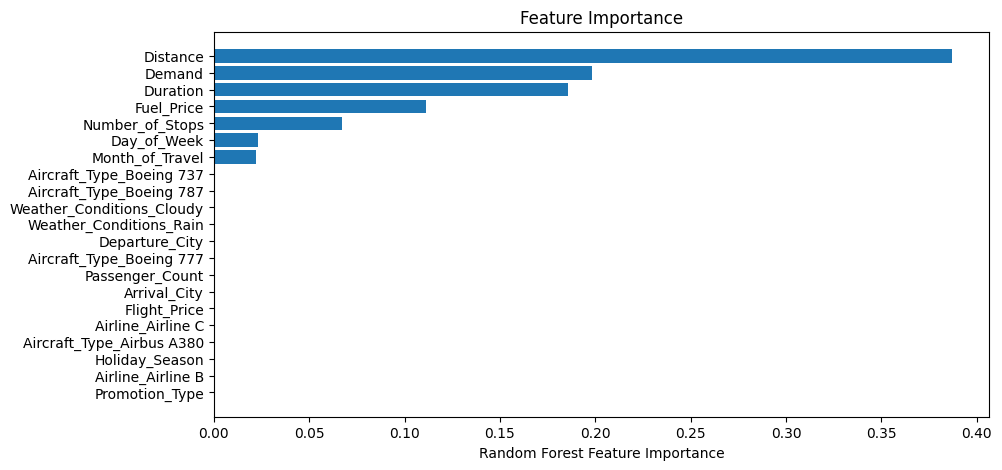

In [157]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(modified.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

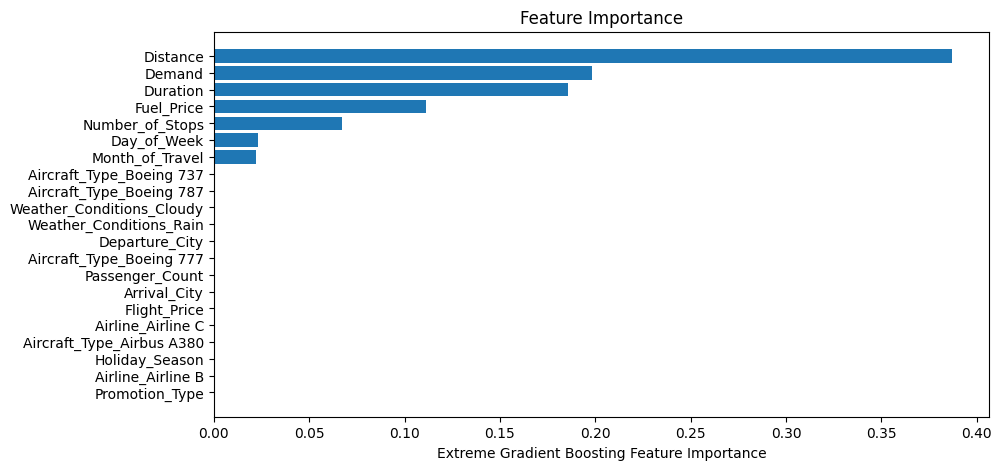

In [158]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(modified.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()


#**Evaluate Your System on the Test Set**

In [159]:
test = pd.read_csv('/content/test - test.csv')

In [160]:
test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,00:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,01:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,00:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,03:22,05:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           5000 non-null   object 
 1   Airline             4573 non-null   object 
 2   Departure_City      4961 non-null   object 
 3   Arrival_City        4970 non-null   object 
 4   Distance            4991 non-null   float64
 5   Departure_Time      5000 non-null   object 
 6   Arrival_Time        5000 non-null   object 
 7   Duration            5000 non-null   float64
 8   Aircraft_Type       4992 non-null   object 
 9   Number_of_Stops     5000 non-null   int64  
 10  Day_of_Week         4975 non-null   object 
 11  Month_of_Travel     4966 non-null   object 
 12  Holiday_Season      5000 non-null   object 
 13  Demand              4966 non-null   object 
 14  Weather_Conditions  4951 non-null   object 
 15  Passenger_Count     5000 non-null   int64  
 16  Promot

In [162]:
test.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [163]:
test.shape

(5000, 18)

In [164]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Airline,8.54
Promotion_Type,0.98
Weather_Conditions,0.98
Departure_City,0.78
Demand,0.68
Month_of_Travel,0.68
Arrival_City,0.60
Day_of_Week,0.50
Fuel_Price,0.20
Distance,0.18


In [165]:
test.isnull().sum()

Flight_ID               0
Airline               427
Departure_City         39
Arrival_City           30
Distance                9
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           8
Number_of_Stops         0
Day_of_Week            25
Month_of_Travel        34
Holiday_Season          0
Demand                 34
Weather_Conditions     49
Passenger_Count         0
Promotion_Type         49
Fuel_Price             10
dtype: int64

In [166]:
test.Airline.value_counts()

Airline A    1551
Airline C    1532
Airline B    1490
Name: Airline, dtype: int64

In [167]:
test['Airline'].fillna(test['Airline'].mode()[0], inplace=True)

In [168]:
test.Departure_City.value_counts()

Lake Michael        9
Smithmouth          7
Matthewmouth        7
Port Michael        7
Port Michelle       7
                   ..
New Mollyside       1
Christinaberg       1
South Taylorport    1
Hebertfort          1
Perrymouth          1
Name: Departure_City, Length: 4273, dtype: int64

In [169]:
#df['Departure_City'].fillna(df['Departure_City'].mode, inplace = True)
test['Departure_City'].fillna(test['Departure_City'].mode()[0], inplace=True)

In [170]:
#df["Arrival_City"].fillna('North Michael',inplace = True)
test['Arrival_City'].fillna(test['Arrival_City'].mode()[0], inplace=True)

In [171]:
test.Distance.value_counts()

6855.0    4
6010.0    4
1161.0    4
8044.0    4
3803.0    4
         ..
9463.0    1
4611.0    1
1851.0    1
3761.0    1
2597.0    1
Name: Distance, Length: 3832, dtype: int64

In [172]:
test.Distance.describe()

count     4991.000000
mean      5460.673212
std       2615.795947
min       1000.000000
25%       3204.500000
50%       5487.000000
75%       7739.000000
max      10000.000000
Name: Distance, dtype: float64

In [173]:
test.Distance.median()

5487.0

In [174]:


test['Distance'].fillna(test['Distance'].median(), inplace=True)


In [175]:
test['Day_of_Week'].fillna(test['Day_of_Week'].mode()[0], inplace=True)

In [176]:
test['Month_of_Travel'].fillna(test['Month_of_Travel'].mode()[0], inplace=True)

In [177]:
test['Demand'].fillna(test['Demand'].mode()[0],inplace = True)
test['Weather_Conditions'].fillna(test['Weather_Conditions'].mode()[0] , inplace = True)
test['Promotion_Type'].fillna(test['Promotion_Type'].mode()[0] , inplace = True)
test['Fuel_Price'].fillna(test['Fuel_Price'].median(), inplace=True)

In [178]:
test['Aircraft_Type'].fillna(test['Aircraft_Type'].mode()[0] , inplace = True)

In [179]:
test.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [180]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
test = looe_encoder.fit_transform(test, test['Distance'])

In [181]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    test[col] = label_encoder.fit_transform(test[col])

In [182]:

# Define the columns to be encoded with one-hot encoding
categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

In [183]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.0000,5460.7206,3096.0,5.52,1,2,1,3,2,110,1,0.95,1,0,0,1,0,0,0,0,0
1,5460.7206,5460.7206,8760.0,11.80,1,4,0,1,0,295,0,1.05,0,0,1,0,0,0,0,0,0
2,5460.7206,5460.7206,6365.0,9.59,1,3,4,1,1,223,0,0.63,0,1,0,0,1,0,0,1,0
3,5460.7206,5460.7206,7836.0,10.21,0,4,7,1,1,223,1,0.88,0,0,1,0,0,0,0,1,0
4,5460.7206,5460.7206,1129.0,1.86,1,2,1,3,0,145,2,1.11,1,0,0,0,0,0,1,0,0


In [184]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [185]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)



In [186]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [187]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [188]:
y_pred1

array([631.13, 935.25, 552.41, ..., 333.64, 737.34, 555.6 ])

In [191]:
submission = pd.read_csv("/content/test - test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
Predicted_flight_price.to_csv('Submission.csv', index = False)

In [197]:
Submission = pd.read_csv('Submission.csv')
Submission

,Flight_ID,Flight_Price
0,F45001,631.13
1,F45002,935.25
2,F45003,552.41
3,F45004,546.34
4,F45005,649.62
...,...,...
4995,F49996,782.15
4996,F49997,542.08
4997,F49998,333.64
4998,F49999,737.34
